<a href="https://colab.research.google.com/github/Saharuth/MachineLearning/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')
print(pd.Timestamp.now())

pandas  version = 1.5.3
numpy   version = 1.23.5
seaborn version = 0.12.2
2023-09-13 08:04:44.467557


In [29]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/worldbank_gdp_gini_birth_death_suicide_rate.csv'
data=pd.read_csv(url)
data.sample(10)

,country,year,"GDP, PPP (current international $)",Gini index (World Bank estimate),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Suicide mortality rate (per 100,000 population)"
424,Arab World,1971,NaN,NaN,44.440353,15.166220,NaN
11737,Qatar,2015,2.385293e+11,NaN,10.033000,1.131000,6.5
5660,Guinea-Bissau,2015,2.774674e+09,NaN,36.819000,10.244000,3.9
5150,Ghana,1977,NaN,NaN,43.455000,14.304000,NaN
6852,Italy,1968,NaN,NaN,17.700000,10.000000,NaN
12253,Serbia,2000,4.525880e+10,NaN,9.800000,13.800000,21.0
6105,IBRD only,1988,NaN,NaN,26.663071,8.486855,NaN
13804,Switzerland,2017,5.674485e+11,32.7,10.300000,7.900000,NaN
5206,Gibraltar,1974,NaN,NaN,NaN,NaN,NaN
4162,Eswatini,1992,3.214057e+09,NaN,37.364000,7.852000,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15576 entries, 0 to 15575
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   country                                          15576 non-null  object 
 1   year                                             15576 non-null  int64  
 2   GDP, PPP (current international $)               6726 non-null   float64
 3   Gini index (World Bank estimate)                 1649 non-null   float64
 4   Birth rate, crude (per 1,000 people)             14515 non-null  float64
 5   Death rate, crude (per 1,000 people)             14492 non-null  float64
 6   Suicide mortality rate (per 100,000 population)  1145 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 851.9+ KB


In [ ]:
data[data['country'].str.contains('Thailand')]

In [7]:
x_col = 'year'
y_col = 'Death rate, crude (per 1,000 people)'
country = 'Thailand'

In [ ]:
df = data[data['country'] == country].copy()
df

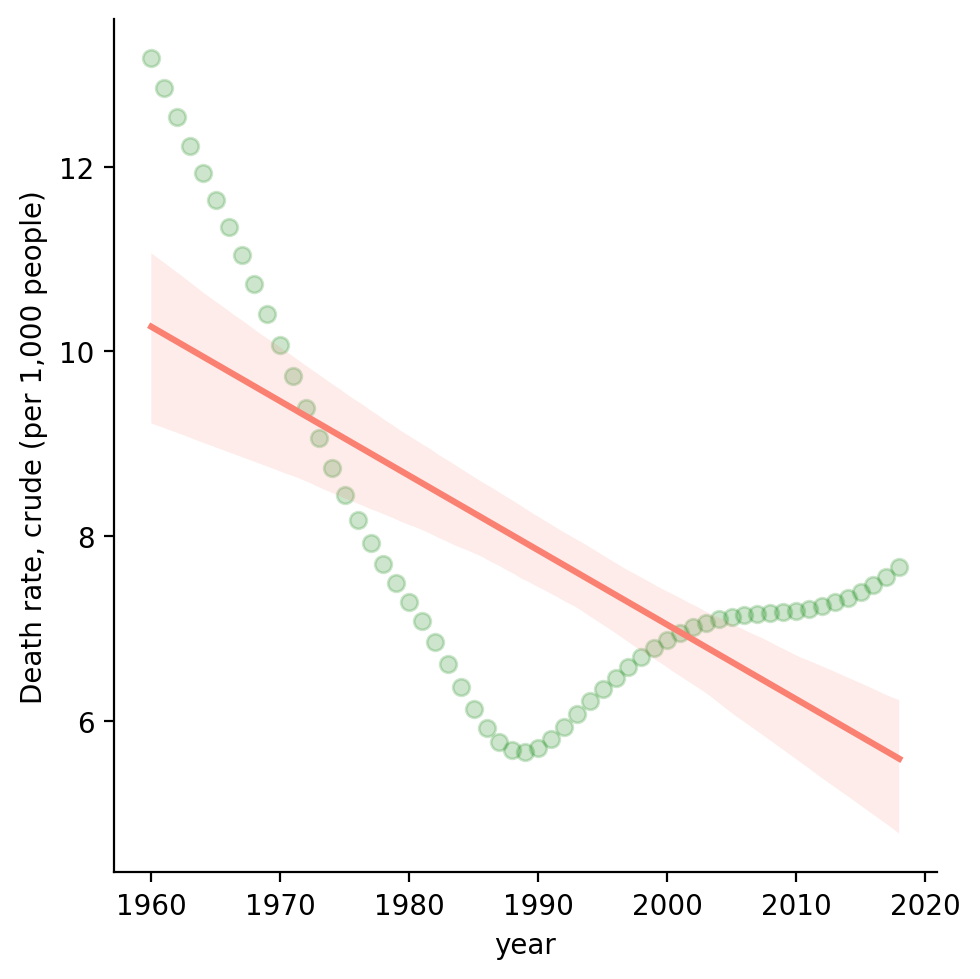

In [11]:
sns.lmplot(x=x_col, y=y_col, data=df, fit_reg=True, scatter_kws={'alpha': .2, 'color': 'green'}, line_kws={'color': 'salmon'})

###SCIKIT-LEARN

In [12]:
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

print(f'sklearn version: {skl.__version__}')

sklearn version: 1.2.2


In [13]:
X = df[[x_col]]
y = df[[y_col]]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

###Linear Regression
##### y = C0 + M x

In [17]:
#simple regression model
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.score(X_train, y_train) # R-squared

0.4353052622557835

In [18]:
print(lm.coef_)
print(lm.intercept_)

[[-0.07661316]]
[160.27616228]


Text(0, 0.5, 'Death rate, crude (per 1,000 people)')

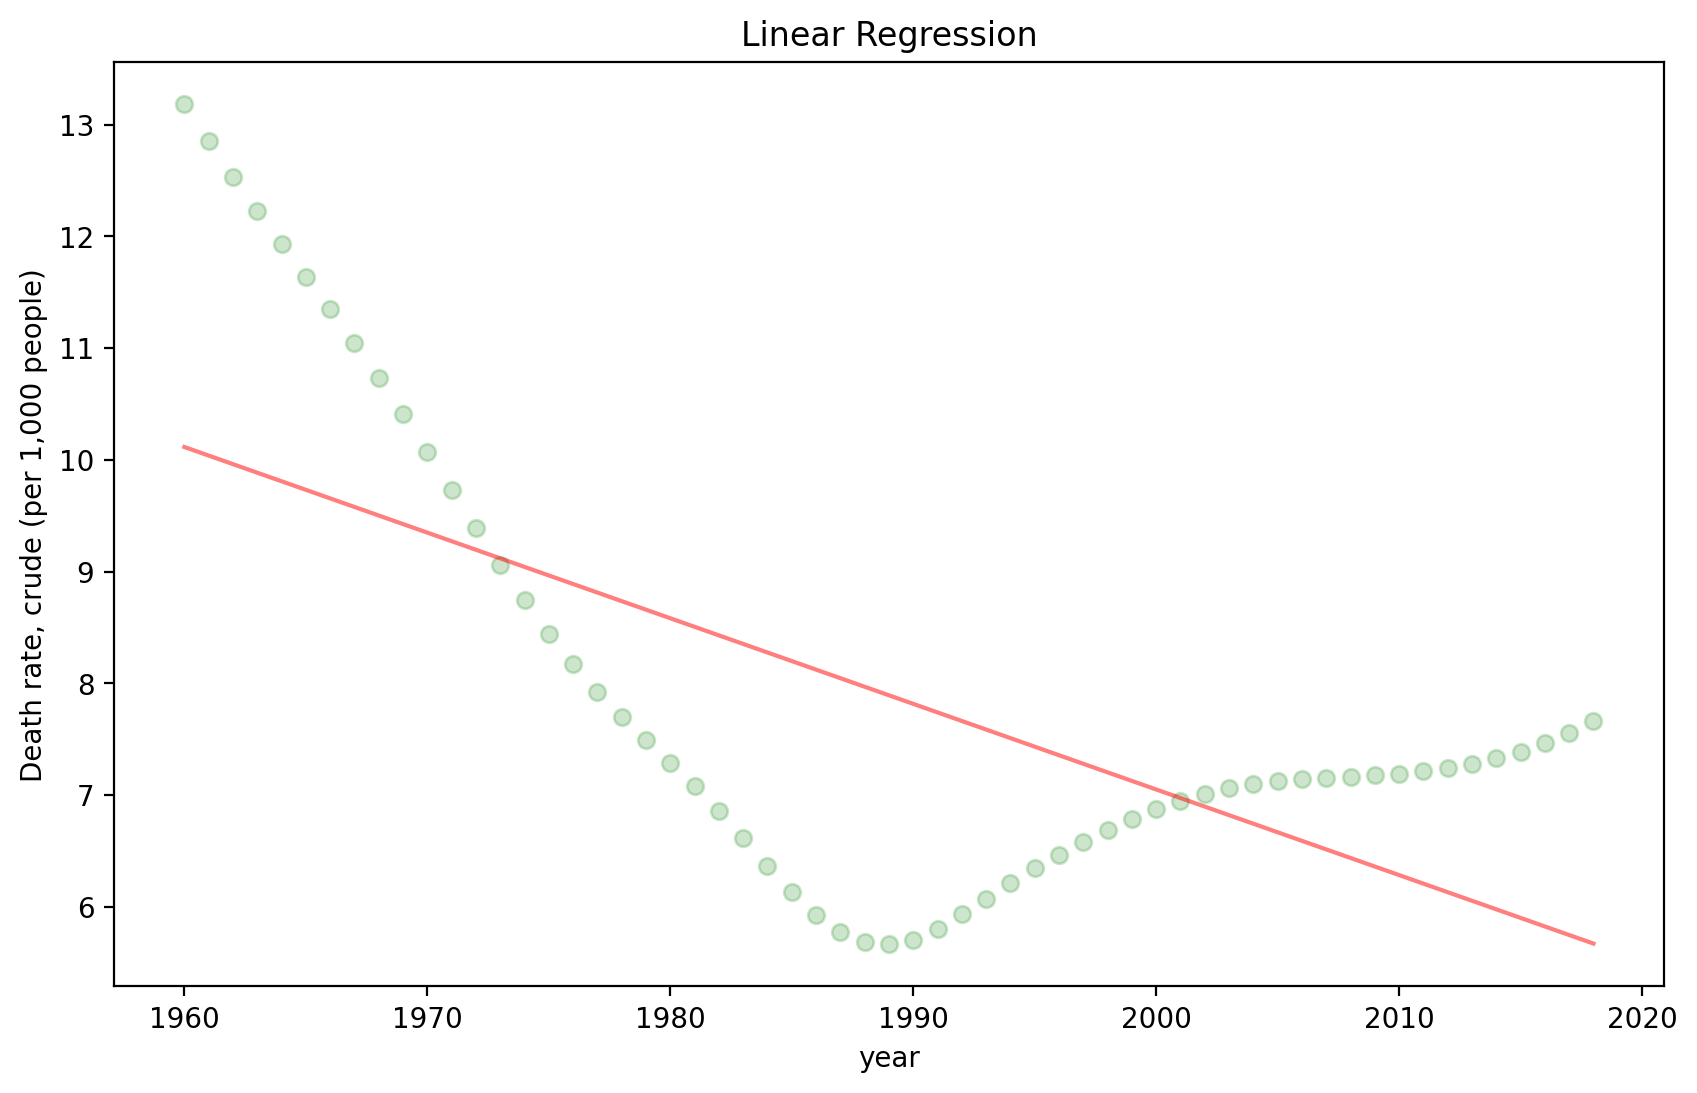

In [19]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X, y, color = 'green', alpha = .2)
plt.plot(X, lm.predict(X), color = 'red', alpha = .5)
plt.title('Linear Regression')
plt.xlabel(x_col)
plt.ylabel(y_col)

In [20]:
lm.predict([[1990], [2021]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[7.81597278],
       [5.44096481]])

###Polynomial Regression
y = c0 + c1 x^1 + c2 x^2 + c3 x^3 + ... + cn x^n

In [47]:
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit_transform([[1990]]) # ex การ transform ข้อมูลให้อยู่ในรูปแบบสมการ polynomial

array([[1.0000e+00, 1.9900e+03, 3.9601e+06]])

In [48]:
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)

In [49]:
X_train_poly[:3]

array([[1.000000e+00, 1.996000e+03, 3.984016e+06],
       [1.000000e+00, 2.000000e+03, 4.000000e+06],
       [1.000000e+00, 1.984000e+03, 3.936256e+06]])

In [50]:
pm = LinearRegression()
pm.fit(X_train_poly, y_train)

LinearRegression()

In [51]:
pm.score(X_train_poly, y_train)

0.9448282949367037

In [52]:
print(pm.intercept_)
print(pm.coef_)

[21619.43539756]
[[ 0.00000000e+00 -2.16491346e+01  5.42121601e-03]]


In [53]:
pm.score(X_test_poly, y_test)

0.9491064757890537

In [64]:
print(X_train_poly[0])

[1.000000e+00 1.996000e+03 3.984016e+06]


In [60]:
# ตัวอย่างสมการที่ได้
print(pm.intercept_ + sum((pm.coef_[0]*X_train_poly[0])))

[5.97412483]


In [37]:
pm.predict(X_train_poly[:3])

array([[5.97412483],
       [6.0303033 ],
       [6.84646291]])

In [41]:
pm.predict(poly_reg.fit_transform([[1996]]))

array([[5.97412483]])

In [39]:
pm.predict(poly_reg.fit_transform([[1996], [2000], [1984]]))

array([[5.97412483],
       [6.0303033 ],
       [6.84646291]])

In [40]:
def prediction(intercept, coef, x):
  v = intercept
  for p in range(len(coef)):
    v += x ** p * coef[p]
  return v

In [65]:
prediction(pm.intercept_, pm.coef_[0], 1996)

array([5.97412483])

Text(0, 0.5, 'Death rate, crude (per 1,000 people)')

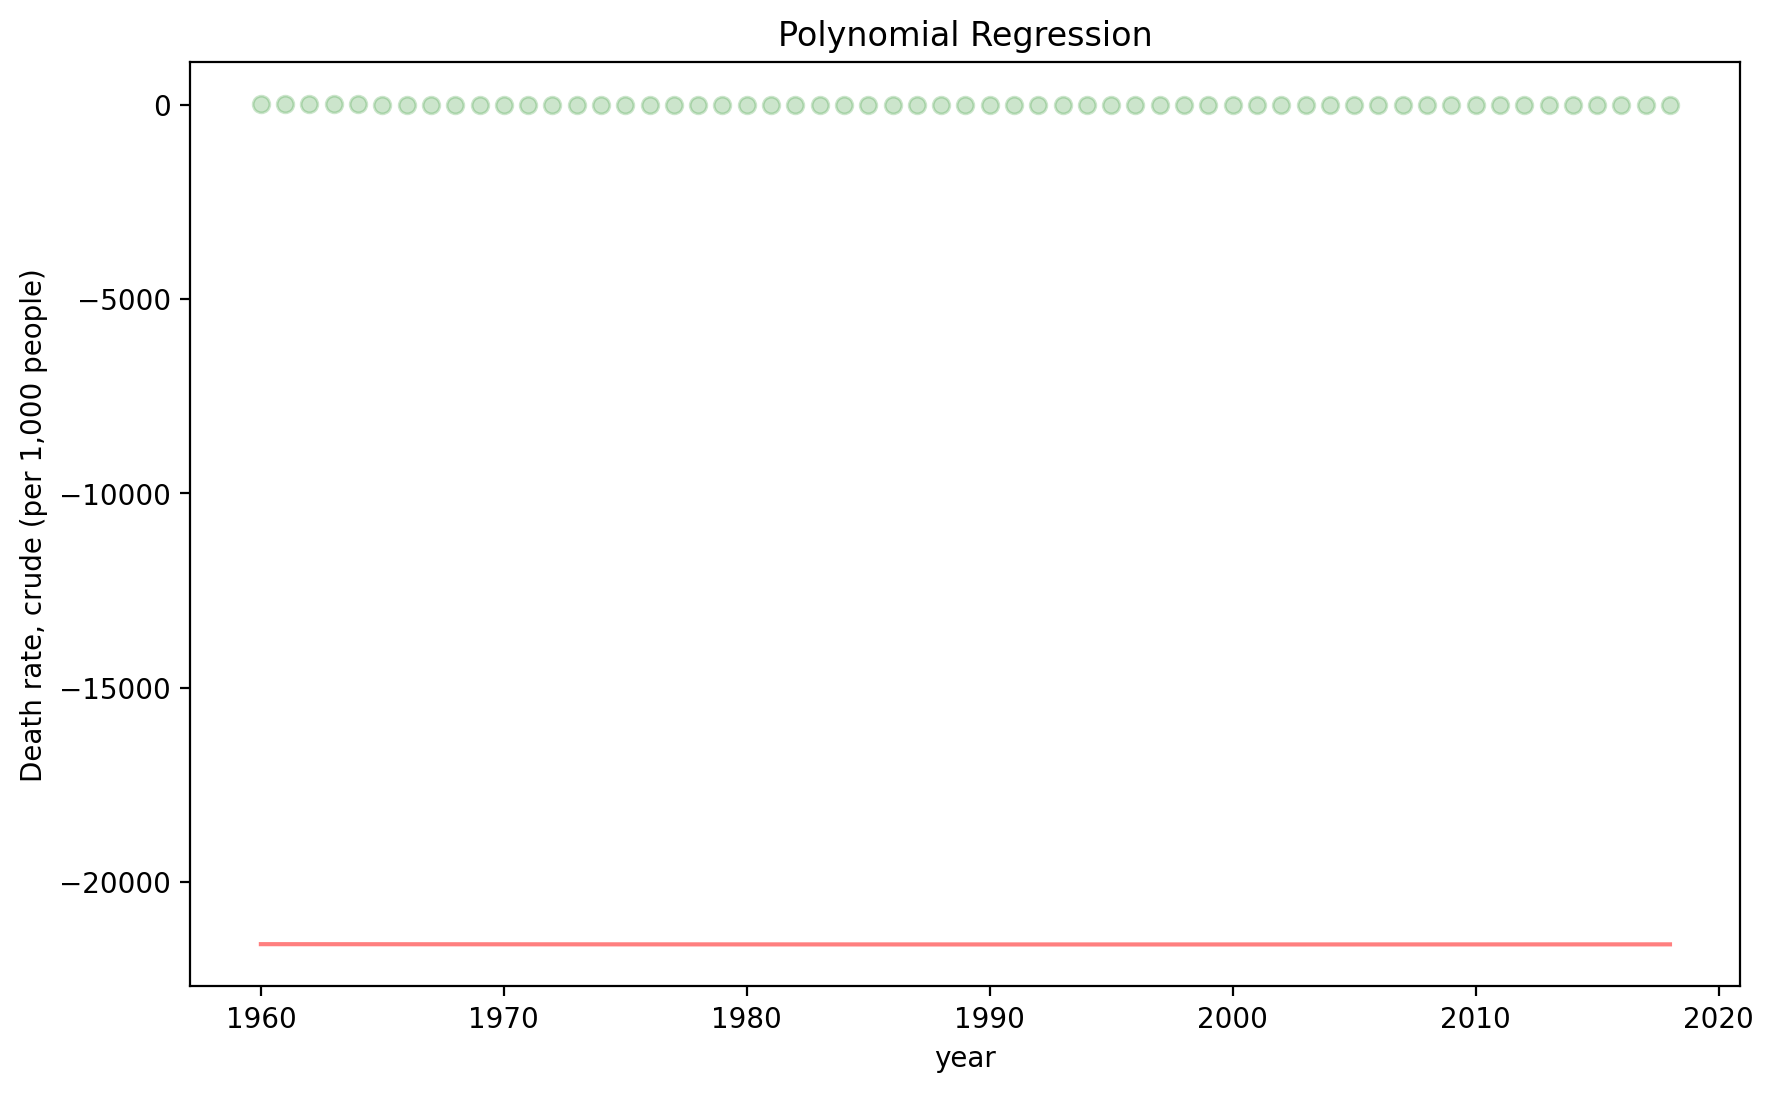

In [67]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X, y, color = 'green', alpha=.2)
plt.plot(X, pm.predict(poly_reg.fit_transform(X)), color = 'red', alpha=.5)
plt.title('Polynomial Regression')
plt.xlabel(x_col)
plt.ylabel(y_col)

In [ ]:
fig = plt.figure(figsize=(8 * 2, 5))
d={'Linear Regression': lm.predict(X),
   'Polynomial Regression': pm.predict(poly.fit_transform(X))}
i=1
for title, y_pred in d.items():
    fig.add_subplot(1, 2, i)
    plt.scatter(X, y, color = 'green', alpha=.2)
    plt.plot(X, y_pred, color = 'red', alpha=.5)
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    i += 1

In [ ]:
def plots(degree_ranges=range(2, 8)):
    import math
    n=len(degree_ranges)
    n_rows=2
    n_cols=math.ceil(n / n_rows)
    fig = plt.figure(figsize=(8 * n_cols, 5 * n_rows))
    i=1
    for degree in degree_ranges:
        poly = PolynomialFeatures(degree = degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.fit_transform(X_test)

        poly.fit(X_train_poly, y_train)
        pm = LinearRegression()
        pm.fit(X_train_poly, y_train)
        rsq_train=pm.score(X_train_poly, y_train) # R-squared
        rsq_test=pm.score(X_test_poly, y_test) # R-squared
        print(f'degree = {degree}: R_square (train) = {rsq_train:.4f}, (test) = {rsq_test:.4f}')
#         print(pm.coef_)

        fig.add_subplot(n_rows, n_cols, i)
        y_pred=pm.predict(poly.fit_transform(X))
        plt.scatter(X, y, color = 'green', alpha=.2)
        plt.plot(X, y_pred, color = 'red', alpha=.5)
        plt.title(f'Polynomial Regression: degree={degree}, R_sq={rsq_train:.4f}')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        i += 1
#     plt.show()

plots(range(1, 7))

In [ ]:
pm.intercept_

In [ ]:
pm.coef_

In [ ]:
pm.score(X_train_poly, y_train) # R-squared

In [ ]:
X_train[:5]

In [ ]:
model1.exog[:5]

In [ ]:
X_train_poly[:5]

In [ ]:
model1_fit.predict(dt['year'][:5])

In [ ]:
pm.predict(X_train_poly[:5])

## statsmodels

### method 1 (using R formula style)

In [ ]:
dt=X_train.copy()
dt[y_col]=y_train
dt[:5]

In [ ]:
dt.columns=['year', 'death_rate']

In [ ]:
import statsmodels.formula.api as smf
formula = 'death_rate ~ year + I(year**2)'
# formula = 'death_rate ~ year + I(year**2) + I(year**3)'
model1 = smf.ols(formula=formula, data=dt)
model1_fit=model1.fit()

In [ ]:
model1_fit.summary()

### method 2 (use sm.OLS)

In [ ]:
import statsmodels.api as sm

model2 = sm.OLS(y_train, X_train_poly)

model2_fit=model2.fit()
model2_fit.summary()

In [ ]:
model2_fit.predict(X_train_poly[:5])

In [ ]:
pm.predict(X_train_poly[:5])

In [ ]:
model1_fit.predict(dt['year'][:5])